<h1>Soal 2: Pengaplikasian</h1>

Selamat, sampai tahap ini kalian telah belajar banyak tentang data science, dari mulai python, data manipulasi, visualisasi, dan pembuatan model. Sekarang saatnya untuk mengaplikasikan semuanya.

Download dan gunakan data [titanic.csv](https://drive.google.com/uc?export=download&id=15-XQkmqj2UlFQH7rASJH1oxWST6o9mbm) sebagai data untuk pembuatan model ML. Pahami betul data ini dengan melakukan EDA (Explolatory Data Analaysis), Visualisasi, Data Analysis, Preprocessing Data, dan Modeling.

<b>(Optional)</b> Download dan gunakan data [titanic_test.csv](https://drive.google.com/uc?export=download&id=15-XQkmqj2UlFQH7rASJH1oxWST6o9mbm) untuk mengetest model kalian dengan melakukan prediksi terhadap data tersebut. Submit hasil prediksinya ke kaggle dan lihat scorenya. https://www.kaggle.com/c/titanic/submit

![alt text](https://drive.google.com/uc?id=1SyflO2YeuCdYhxwPF6CAtMeaNN1qTaFx)

In [13]:
import pandas as pd

df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

#encoding categorical data 
df = pd.get_dummies (df, columns = ['Embarked'])
df2 = pd.get_dummies (df2, columns = ['Embarked'])

obj_dict = {'male' : 1,
           'female' : 0
           }
df['Sex'] = df['Sex'].replace(obj_dict)
df2['Sex'] = df2['Sex'].replace(obj_dict)
df2.head()

# EDA
df.info()

#handing missing value 
df = df.fillna (method = 'bfill')
df.isnull().sum()

df2 = df2.fillna (method = 'ffill')
df2.isnull().sum()

df['Cabin'].value_counts()
df['Cabin'] = df['Cabin'].fillna('C78')

df2['Cabin'].value_counts()
df2['Cabin'] = df2['Cabin'].fillna('C89 ')

df['Age'] = df['Age'].astype(int)
df2['Age'] = df2['Age'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(3)
memory usage: 79.3+ KB


In [4]:
#class imbalanced
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

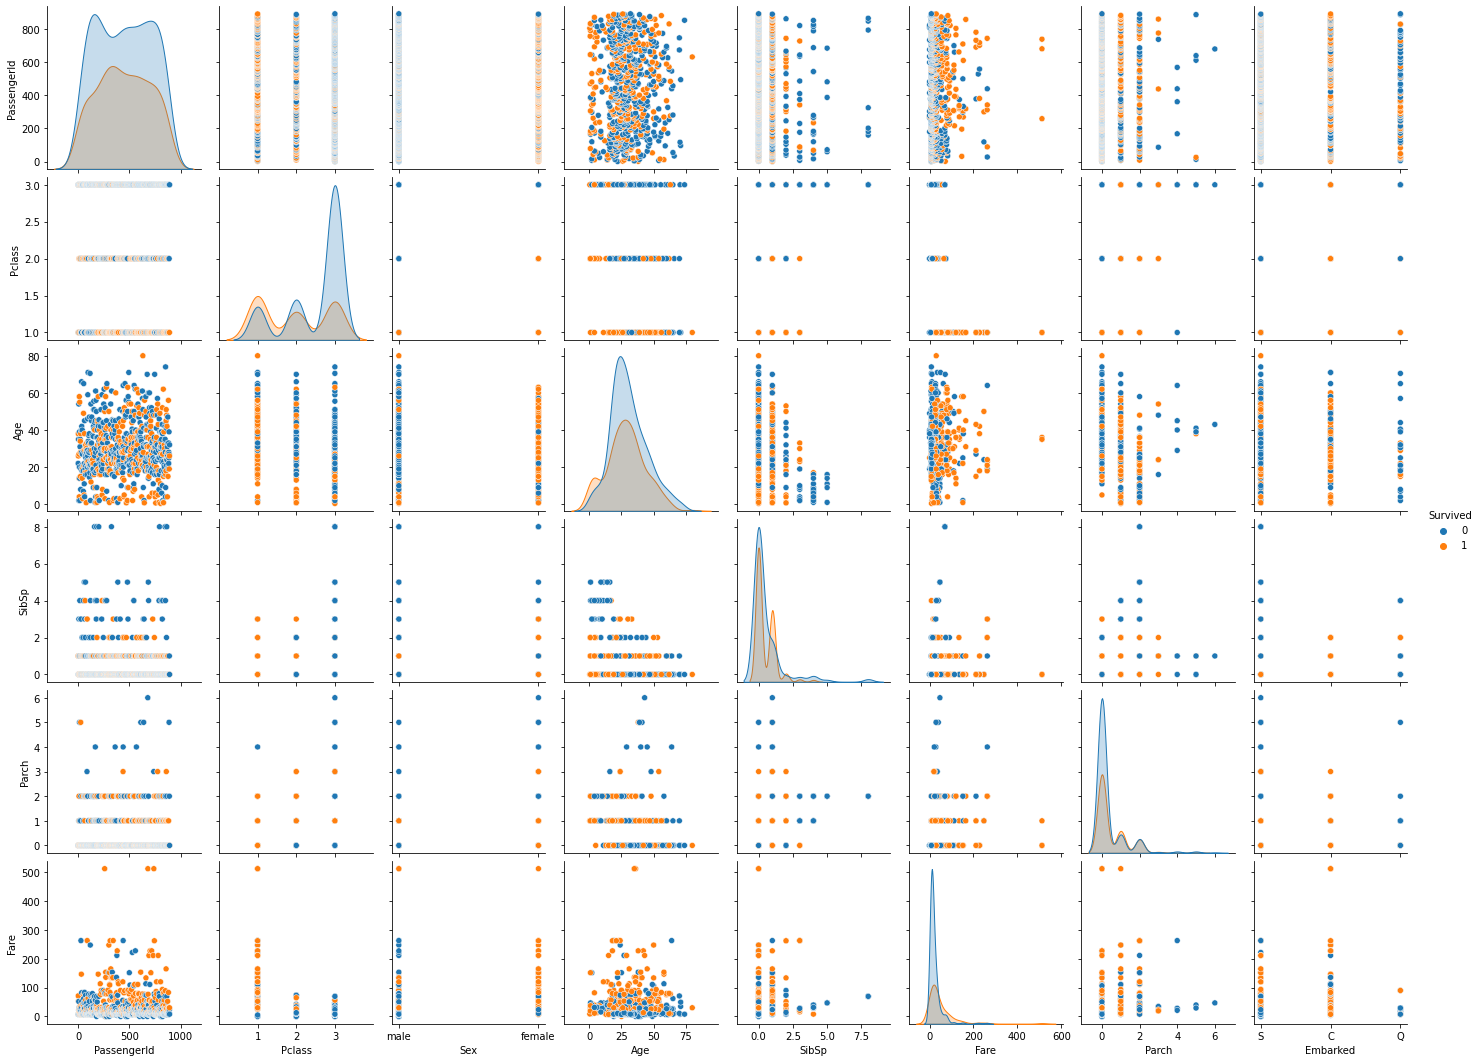

In [5]:
import seaborn as sns
df = pd.read_csv('train.csv')
sns.pairplot (df, x_vars = ["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Fare", "Parch", "Embarked"], hue = "Survived"  )

In [15]:
# pisahkan data feature dan data target 
x = df.drop (['Name','Survived', 'Ticket', 'Cabin'], axis = 1)
y = df['Survived']

#test data 
x_test = df2.drop (['Name', 'Ticket', 'Cabin'], axis = 1)
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34,0,0,7.8292,0,1,0
1,893,3,0,47,1,0,7.0000,0,0,1
2,894,2,1,62,0,0,9.6875,0,1,0
3,895,3,1,27,0,0,8.6625,0,0,1
4,896,3,0,22,1,1,12.2875,0,0,1


In [16]:
# modelling 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
import numpy as np

model_knn = KNeighborsClassifier ()
param_grid = {'n_neighbors' : np.arange(5,50), 'weights' : ['uniform', 'distance']}

gsvc = GridSearchCV (model_knn, param_grid, scoring = 'accuracy', cv = 5)

gsvc.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [17]:
gsvc.best_params_

{'n_neighbors': 47, 'weights': 'uniform'}

In [18]:
gsvc.best_score_

0.6408762789529847

In [19]:
y_test = gsvc.predict(x_test)
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
result = cross_val_score (model_knn, x_test, y_test, cv = 10)
result.mean()

0.9951219512195124